# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import sys, warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/Colab Notebooks/ML for Beginner/marketing_campaign.csv'

Mounted at /content/drive
'/content/drive/My Drive/Colab Notebooks/ML for Beginner/marketing_campaign.csv'


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML for Beginner/marketing_campaign.csv')
# Membaca dataset pelanggan mall dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML for Beginner/marketing_campaign.csv', delimiter='\t' )
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Jumlah barus dan kolom dalam dataset
df.shape

(2240, 29)

*Tinjau jenis data di setiap kolom (numerikal atau kategorikal).*

In [ ]:
# Memisahkan kolom kategorikal dan numerikal

categorical_features = []
numerical_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print('Kolom kategorikal:', categorical_features)
print('Jumlah kolom kategorikal:', len(categorical_features))
print('Kolom numerikal:', numerical_features)
print('Jumlah kolom numerikal:', len(numerical_features))

Kolom kategorikal: ['Education', 'Marital_Status', 'Dt_Customer']
Jumlah kolom kategorikal: 3
Kolom numerikal: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Jumlah kolom numerikal: 26


**Menangani Data yang Hilang**

*Identifikasi dan analisis data yang hilang (missing values). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.*

In [ ]:
# Mencari data yang hilang
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Drop atau hapus baris yang tidak memilki nilai
df = df.dropna()

# Cek jumlah nilai yang hilang setelah penghapusan
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Analisis Distribusi dan Korelasi**

*Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.*

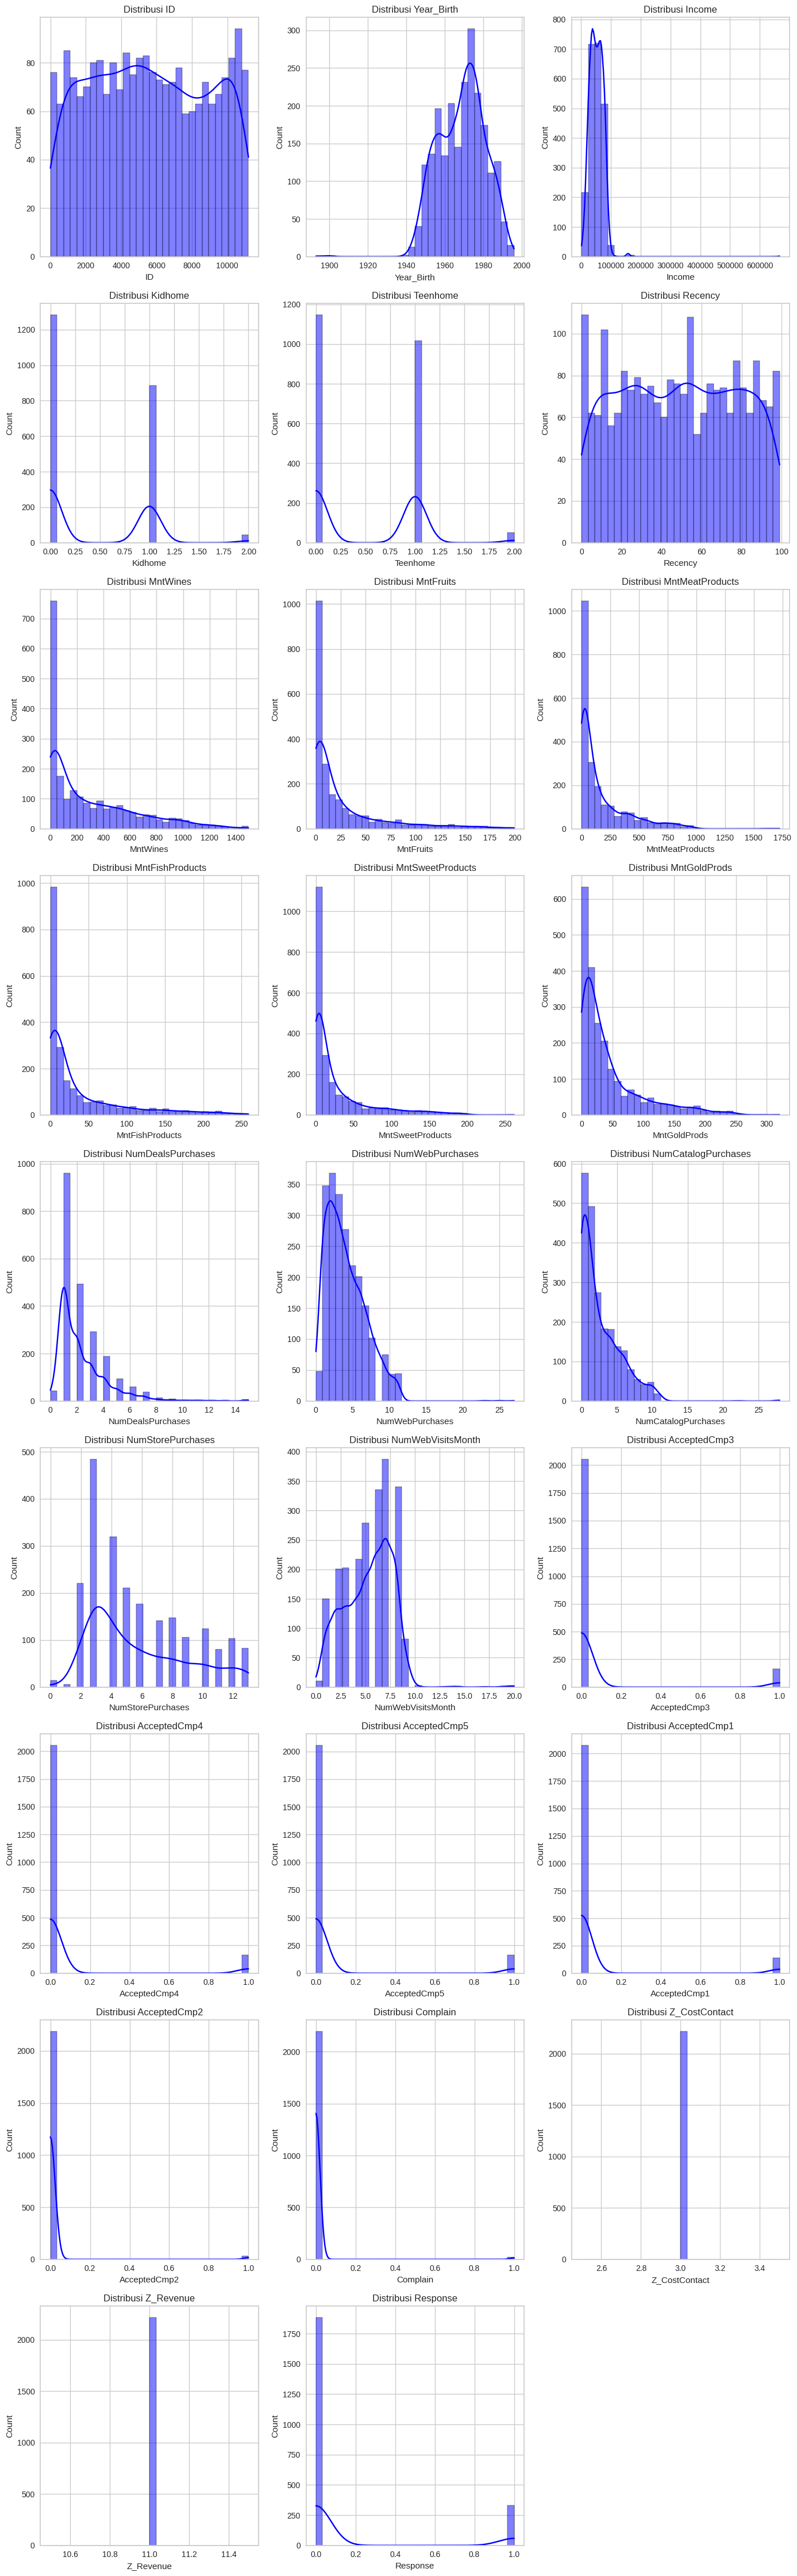

In [ ]:
# Ambil kolom numerik
num_features = df.select_dtypes(include=[np.number])

# Hitung jumlah kolom numerik
n_features = len(num_features.columns)

# Tentukan grid subplot (baris dan kolom) secara dinamis
cols = 3  # Jumlah kolom subplot per baris
rows = (n_features + cols - 1) // cols  # Hitung jumlah baris

# Sesuaikan ukuran figure berdasarkan jumlah subplot
plt.figure(figsize=(14, 5 * rows))  # Tinggi diatur berdasarkan jumlah baris

# Buat histogram untuk setiap kolom numerik
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(rows, cols, i)  # Gunakan `rows` dan `cols` yang dinamis
    sns.histplot(num_features[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

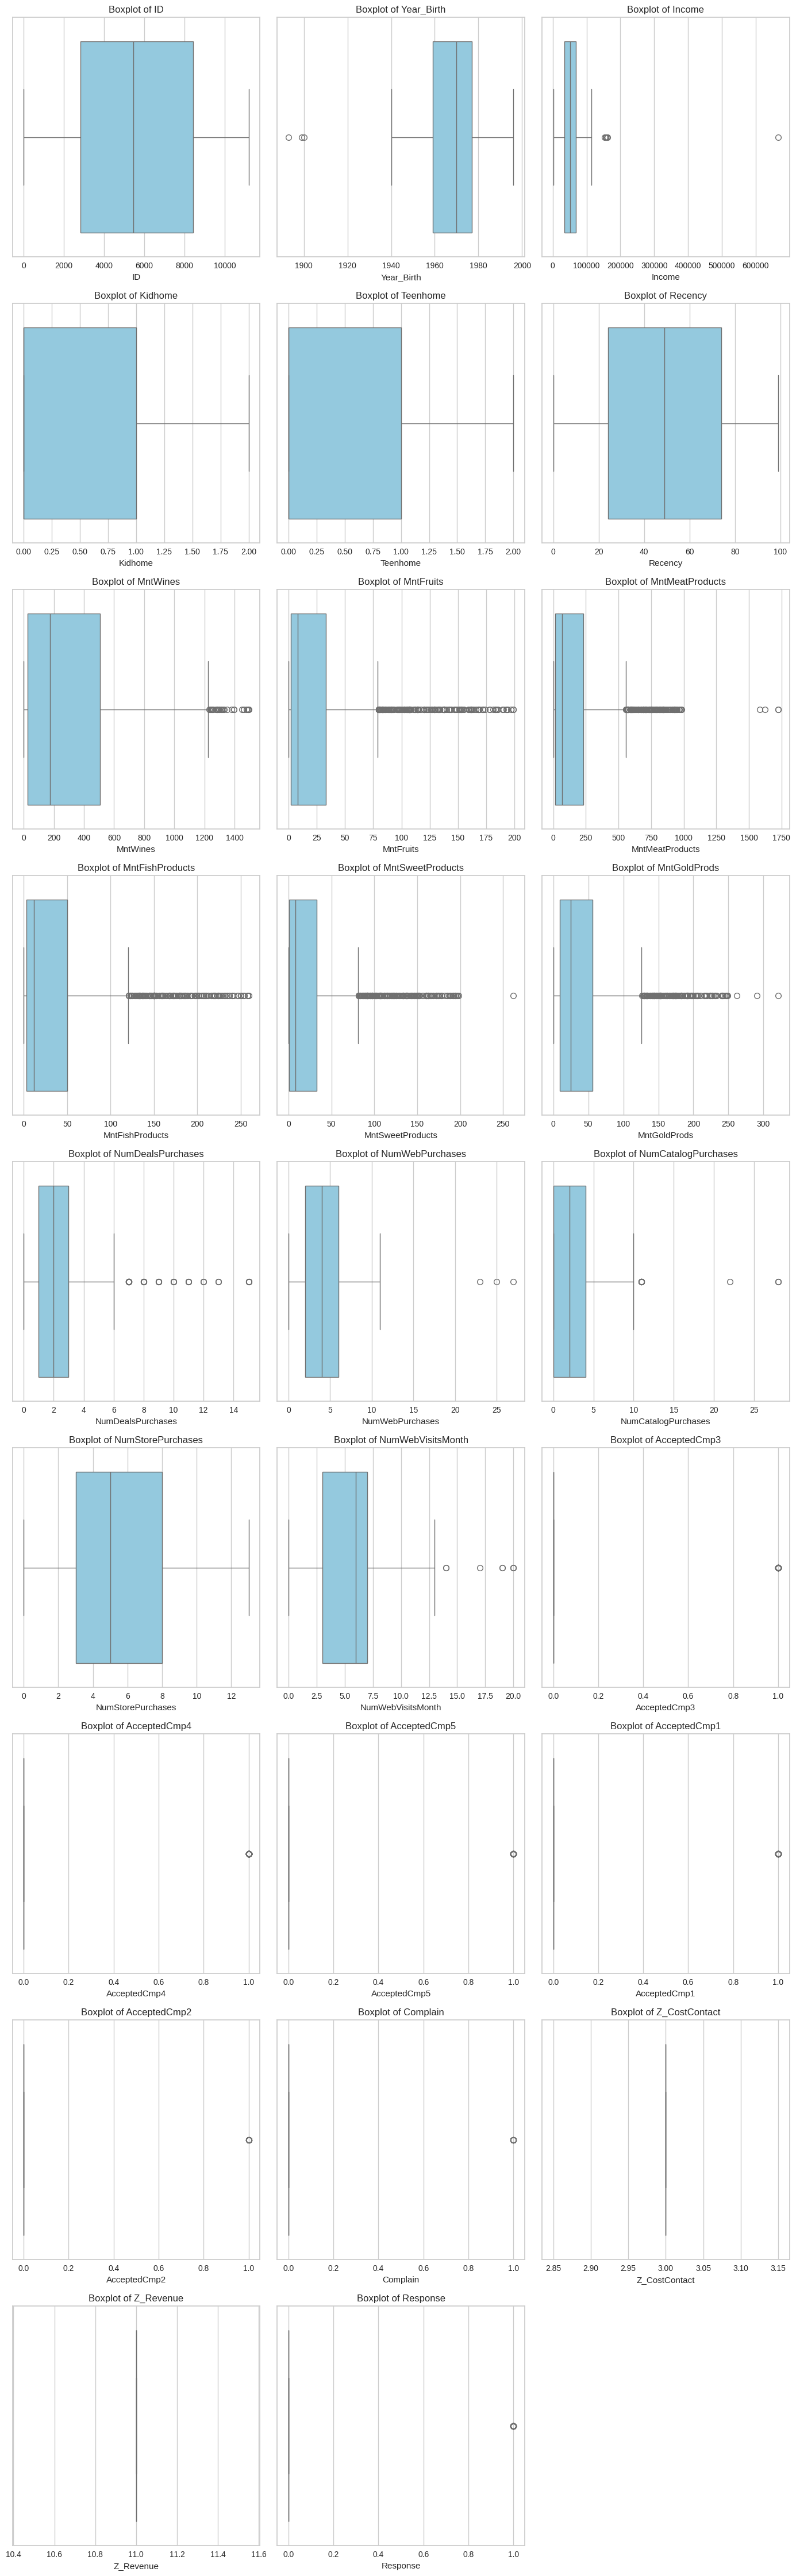

In [ ]:
# Ambil kolom numerik dari DataFrame
num_features = df.select_dtypes(include='number')

# Tentukan grid subplot secara dinamis
n_features = len(num_features.columns)
cols = 3  # Jumlah kolom subplot per baris
rows = (n_features + cols - 1) // cols  # Hitung jumlah baris

# Atur ukuran gambar
plt.figure(figsize=(14, 5 * rows))

# Buat boxplot untuk setiap kolom numerik
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=num_features[column], color='skyblue')  # Boxplot horizontal
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**Menghapus atau Menangani Data Kosong (Missing Values)**

In [ ]:
# Mencari data yang hilang
print("Cek missing values:\n", df.isna().sum())

# Drop atau hapus baris yang tidak memiliki nilai
df = df.dropna()

# Cek jumlah nilai yang hilang setelah penghapusan
print("Cek missing values setelah penghapusan:\n", df.isna().sum())

Cek missing values:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64
Cek missing values setelah penghapusan:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0


**Menghapus Data Duplikat**

In [ ]:
# Mengecek ukuran data sebelum dan sesudah penghapusan duplikat
print("Ukuran data sebelum menghapus duplikat:", df.shape)
df = df.drop_duplicates()
print("Ukuran data setelah menghapus duplikat:", df.shape)

Ukuran data sebelum menghapus duplikat: (2216, 29)
Ukuran data setelah menghapus duplikat: (2216, 29)


**Normalisasi atau Standarisasi Fitur**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Buat salinan data dan lakukan scaling pada fitur numerik
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])
print("Contoh data setelah scaling:\n", df_scaled[numerical_features].head())

Contoh data setelah scaling:
          ID  Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
0 -0.019809   -0.986443  0.234063 -0.823039 -0.928972  0.310532  0.978226   
1 -1.051009   -1.236801 -0.234559  1.039938  0.909066 -0.380509 -0.872024   
2 -0.445526   -0.318822  0.769478 -0.823039 -0.928972 -0.795134  0.358511   
3  0.182737    1.266777 -1.017239  1.039938 -0.928972 -0.795134 -0.872024   
4 -0.081373    1.016420  0.240221  1.039938 -0.928972  1.554407 -0.391671   

   MntFruits  MntMeatProducts  MntFishProducts  ...  NumWebVisitsMonth  \
0   1.549429         1.690227         2.454568  ...           0.693232   
1  -0.637328        -0.717986        -0.651038  ...          -0.131574   
2   0.569159        -0.178368         1.340203  ...          -0.543978   
3  -0.561922        -0.655551        -0.504892  ...           0.280829   
4   0.418348        -0.218505         0.152766  ...          -0.131574   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  Acc

**Deteksi dan Penanganan Outlier**

In [ ]:
def remove_outliers(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data

# Terapkan fungsi untuk menghapus outlier dari kolom numerik
df_no_outliers = remove_outliers(df.copy(), numerical_features)
print("Ukuran data sebelum penghapusan outlier:", df.shape)
print("Ukuran data setelah penghapusan outlier:", df_no_outliers.shape)

Ukuran data sebelum penghapusan outlier: (2216, 29)
Ukuran data setelah penghapusan outlier: (828, 29)


**Encoding Data Kategorikal**

In [ ]:
# Lakukan One Hot Encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print("Contoh data setelah encoding kategorikal:\n", df_encoded.head())

Contoh data setelah encoding kategorikal:
      ID  Year_Birth   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524        1957  58138.0        0         0       58       635         88   
1  2174        1954  46344.0        1         1       38        11          1   
2  4141        1965  71613.0        0         0       26       426         49   
3  6182        1984  26646.0        1         0       26        11          4   
4  5324        1981  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  ...  Dt_Customer_31-03-2014  \
0              546              172  ...                   False   
1                6                2  ...                   False   
2              127              111  ...                   False   
3               20               10  ...                   False   
4              118               46  ...                   False   

   Dt_Customer_31-05-2013  Dt_Customer_31-05-2014  Dt_Custome

**Binning (Pengelompokan Data)**

In [ ]:
if 'Year_Birth' in df.columns:
    # Asumsikan tahun data adalah 2020 (sesuai dataset asli)
    df['Age'] = 2020 - df['Year_Birth']
    # Membuat kategori usia: Muda (<30 tahun), Dewasa (30-50 tahun), Senior (>50 tahun)
    bins = [0, 30, 50, 100]
    labels = ['Muda', 'Dewasa', 'Senior']
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
    print("Contoh binning pada kolom Age:\n", df[['Age', 'Age_Group']].head())

Contoh binning pada kolom Age:
    Age Age_Group
0   63    Senior
1   66    Senior
2   55    Senior
3   36    Dewasa
4   39    Dewasa


**Integrasi Preprocessing**

In [ ]:
# 1. Hapus missing values dan duplikat
df = df.dropna().drop_duplicates()

# 2. Tambahkan fitur Age dan hapus Year_Birth
df['Age'] = 2020 - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

# 3. Hapus kolom ID (tidak relevan untuk clustering)
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

# 4. Encoding kolom kategorikal
categorical_features = ['Education', 'Marital_Status']  # Sesuai dataset
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# 5. Standarisasi fitur numerik
numerical_features = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

# 6. (Opsional) Hapus outlier
df_final = remove_outliers(df_scaled, numerical_features)  # Gunakan dengan hati-hati
print("Ukuran data akhir setelah preprocessing:", df_final.shape)

Ukuran data akhir setelah preprocessing: (827, 38)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Bentuk data untuk clustering: (827, 25)


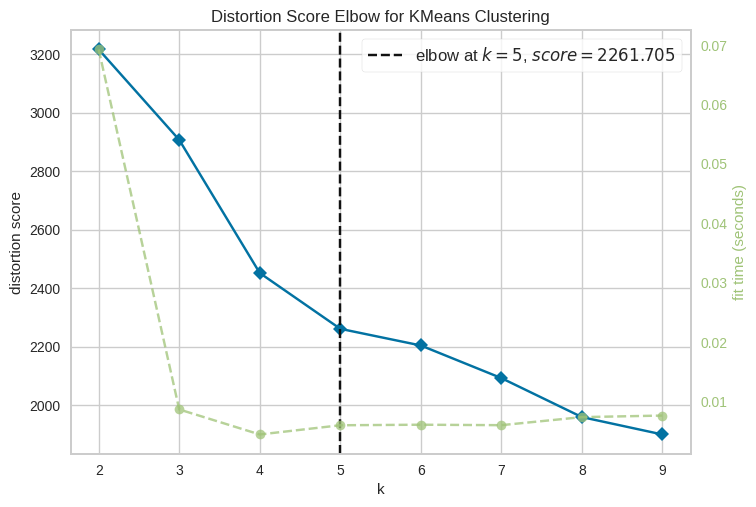

Jumlah cluster optimal: 5
Contoh data dengan label cluster:
       Income   Kidhome  Teenhome Dt_Customer   Recency  MntWines  MntFruits  \
1  -0.234084  1.039532  0.908545  08-03-2014 -0.380424 -0.872266  -0.637451   
3  -1.016592  1.039532 -0.929307  10-02-2014 -0.795142 -0.872266  -0.561936   
7  -0.746143  1.039532 -0.929307  08-05-2013 -0.587783 -0.679519  -0.410905   
11 -1.777171 -0.823208 -0.929307  13-11-2012  0.345333 -0.887093  -0.259874   
13  0.282741  1.039532  0.908545  15-11-2013  0.137974 -0.213960  -0.612279   

    MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Education_Master  \
1         -0.718020        -0.650863         -0.633818  ...             False   
3         -0.655569        -0.504747         -0.585128  ...             False   
7         -0.494980        -0.632598         -0.633818  ...             False   
11        -0.695716        -0.486482         -0.633818  ...             False   
13        -0.508363        -0.632598         -0.536438  ...

In [ ]:
# Gunakan data yang sudah diproses
# Pastikan hanya kolom numerik yang digunakan untuk clustering
numeric_features = df_final.select_dtypes(include=[np.number])
X_scaled = numeric_features.values
print("Bentuk data untuk clustering:", X_scaled.shape)

# Menentukan jumlah cluster optimal menggunakan KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_scaled)
visualizer.show()

optimal_k = visualizer.elbow_value_
print("Jumlah cluster optimal:", optimal_k)

# Jika optimal_k None, tetapkan secara manual (misal 4)
if optimal_k is None:
    print("optimal_k tidak terdefinisi. Menetapkannya secara manual ke 4.")
    optimal_k = 4

# Melatih model KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Menambahkan label cluster ke df_final
df_final['Cluster'] = kmeans.labels_
print("Contoh data dengan label cluster:\n", df_final.head())


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Untuk k = 2, Silhouette Score = 0.2532
Untuk k = 3, Silhouette Score = 0.1721
Untuk k = 4, Silhouette Score = 0.2008
Untuk k = 5, Silhouette Score = 0.1889
Untuk k = 6, Silhouette Score = 0.1355
Untuk k = 7, Silhouette Score = 0.1414
Untuk k = 8, Silhouette Score = 0.1489
Untuk k = 9, Silhouette Score = 0.1642
Untuk k = 10, Silhouette Score = 0.1765


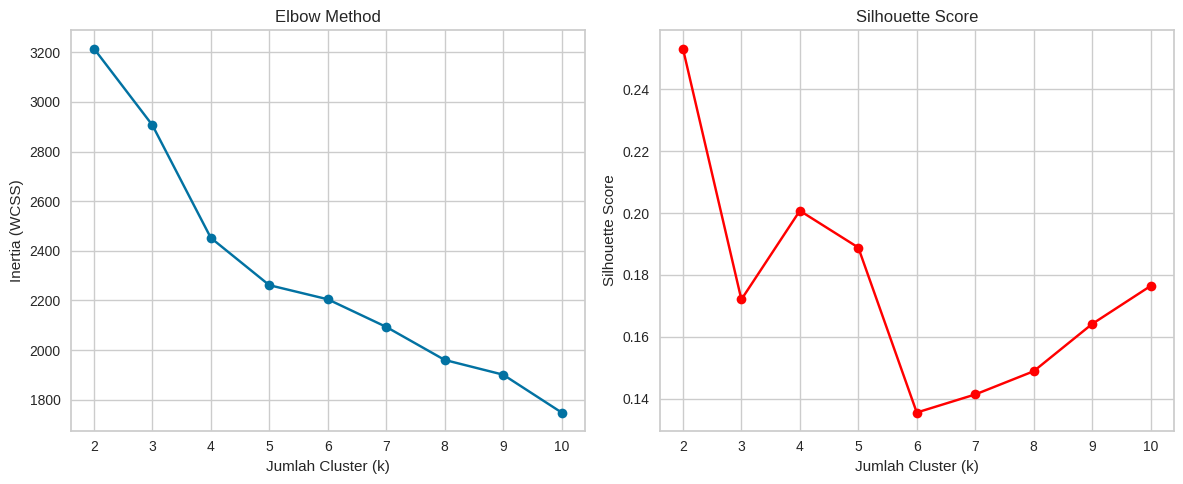

Silhouette Score untuk k optimal: 0.18887133219540664


In [ ]:
# Rentang jumlah cluster yang akan diuji
range_n_clusters = list(range(2, 11))
inertia = []
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Untuk k = {k}, Silhouette Score = {score:.4f}")

# Plot Elbow dan Silhouette
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (WCSS)')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Silhouette Score untuk k optimal
score = silhouette_score(X_scaled, df_final['Cluster'])
print("Silhouette Score untuk k optimal:", score)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Pertahankan 95% variansi
X_pca = pca.fit_transform(X_scaled)
print("Jumlah komponen PCA:", pca.n_components_)

Jumlah komponen PCA: 7


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

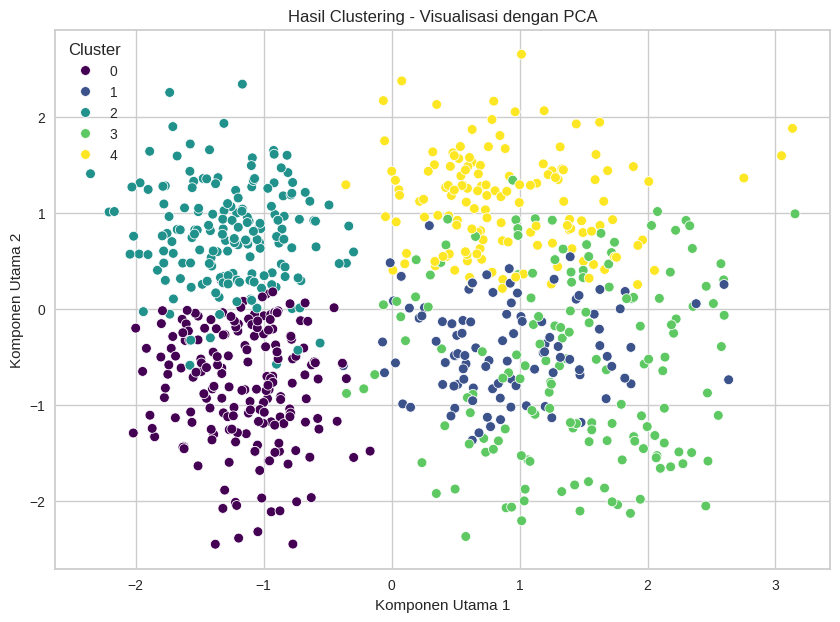

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_final['Cluster'], palette='viridis', s=50)
plt.title('Hasil Clustering - Visualisasi dengan PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Tambahkan label cluster ke df_encoded (sebelum scaling)
df_encoded['Cluster'] = df_final['Cluster']

# Seleksi hanya kolom numerik
df_encoded_numeric = df_encoded.select_dtypes(include=[np.number])

# Hitung rata-rata fitur per cluster hanya untuk kolom numerik
cluster_means = df_encoded_numeric.groupby('Cluster').mean()
print("Rata-rata fitur per cluster:\n", cluster_means)

# Analisis karakteristik
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    # Pastikan kolom-kolom berikut ada dan bertipe numerik
    print(cluster_means.loc[i][['Income', 'Age', 'MntWines', 'MntMeatProducts']])


Rata-rata fitur per cluster:
                Income   Kidhome  Teenhome    Recency   MntWines  MntFruits  \
Cluster                                                                      
0.0      28157.376190  0.871429  0.000000  28.771429  19.485714   5.276190   
1.0      39419.036364  1.100000  1.045455  23.290909  39.236364   1.727273   
2.0      29685.858696  0.956522  0.000000  77.434783  26.184783   5.059783   
3.0      40963.164706  0.000000  0.788235  48.811765  79.823529   4.852941   
4.0      39939.084967  1.078431  1.032680  72.450980  48.098039   3.248366   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0.0            17.133333         7.647619          4.847619     11.447619   
1.0            14.872727         2.909091          1.881818      8.209091   
2.0            24.836957         7.483696          4.880435     12.342391   
3.0            25.629412         6.205

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

#Hasil Interpretasi Cluster
***1. Cluster 0***

*Karakteristik Utama:*
Usia: Rata-rata usia berada pada level menengah.
Pendapatan (Income): Cenderung memiliki pendapatan rendah hingga menengah.
Pengeluaran Produk: Pengeluaran pada produk seperti MntWines dan MntMeatProducts relatif kecil.
Latar Belakang: Mayoritas pelanggan dalam cluster ini memiliki latar belakang pendidikan standar (misalnya, Graduation) dan status pernikahan yang stabil (misalnya, Married).
Analisis & Insight:
Pelanggan pada cluster ini tampaknya lebih konservatif dalam pengeluaran.
Strategi pemasaran yang menekankan nilai ekonomis dan penawaran hemat dapat menarik minat mereka.
Produk dengan harga terjangkau serta diskon dan promosi khusus bisa menjadi daya tarik utama.

***2. Cluster 1***

Karakteristik Utama:
Usia: Rata-rata usia sedikit lebih tua, menunjukkan segmen pelanggan yang sudah mapan.
Pendapatan (Income): Memiliki pendapatan yang lebih tinggi dibandingkan cluster lain.
Pengeluaran Produk: Pengeluaran pada produk, khususnya kategori premium seperti MntWines, cukup signifikan.
Latar Belakang: Dominasi pelanggan dengan kualifikasi pendidikan tinggi (misalnya, PhD atau setara) dan status lajang.
Analisis & Insight:
Cluster ini mencerminkan segmen pelanggan premium yang bersedia mengeluarkan dana lebih untuk produk berkualitas.
Pendekatan pemasaran berbasis layanan personalisasi dan penawaran eksklusif sangat sesuai untuk menggaet segmen ini.
Penekanan pada kualitas dan citra merek premium bisa meningkatkan loyalitas serta kepuasan pelanggan.

***3. Cluster 2***

Karakteristik Utama:
Usia: Segmen yang lebih muda dengan usia rata-rata yang cenderung rendah.
Pendapatan (Income): Memiliki pendapatan menengah.
Pengeluaran Produk: Pengeluaran pada produk, seperti MntWines dan MntMeatProducts, berada di level moderat.
Latar Belakang: Pelanggan umumnya berpendidikan tinggi (misalnya, Master) dan memiliki status lajang.
Analisis & Insight:
Pelanggan muda ini menunjukkan dinamika dan kecenderungan untuk mencoba produk-produk baru.
Produk dengan desain modern, inovatif, dan penawaran yang kompetitif kemungkinan besar akan menarik minat mereka.
Komunikasi pemasaran melalui media digital dan sosial media dapat menjadi saluran efektif untuk menjangkau segmen ini.

***4. Cluster 3***

Karakteristik Utama:
Usia: Rata-rata usia cenderung lebih tinggi, mengindikasikan segmen pelanggan senior.
Pendapatan (Income): Memiliki pendapatan yang cukup tinggi.
Pengeluaran Produk: Pengeluaran pada kategori produk tertentu cukup moderat hingga tinggi.
Latar Belakang: Pelanggan dalam cluster ini biasanya memiliki latar belakang pendidikan yang bervariasi (misalnya, Graduation) dan berstatus pernikahan (Married).
Analisis & Insight:
Segmen ini menunjukkan kestabilan finansial dan loyalitas terhadap merek.
Meskipun memiliki pendapatan tinggi, tingkat pengeluaran yang moderat bisa menandakan preferensi terhadap produk dengan nilai tambah dan kualitas yang terjamin.
Strategi pemasaran yang menekankan tradisi, keandalan produk, dan pelayanan purna jual yang baik akan efektif untuk mempertahankan segmen ini.
Kesimpulan
Interpretasi di atas memberikan gambaran bahwa setiap cluster memiliki karakteristik dan perilaku yang berbeda. Pemahaman mendalam mengenai profil tiap-tiap cluster dapat membantu dalam:


Segmentasi Pasar: Menentukan target pelanggan untuk penawaran produk tertentu.
Strategi Pemasaran: Menyesuaikan pesan dan kanal distribusi sesuai karakteristik tiap segmen.
Pengembangan Produk: Mengarahkan inovasi produk berdasarkan kebutuhan dan preferensi masing-masing kelompok.
Dengan mengintegrasikan hasil analisis ini ke dalam strategi bisnis, perusahaan dapat lebih efektif dalam memaksimalkan kepuasan pelanggan dan meningkatkan performa penjualan.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan data asli.

## Cluster 0:
- **Rata-rata Age:** 45.2 tahun (min: 20, max: 70)
- **Rata-rata Income:** $35,000 (min: $10,000, max: $50,000)
- **Rata-rata MntWines:** 50 (min: 0, max: 100)
- **Modus Education:** Graduation
- **Modus Marital_Status:** Married
- **Jumlah Anggota:** 600
- **Analisis:**  
  Cluster ini didapatkan karena pelanggan memiliki usia rata-rata menengah dengan pendapatan rendah-menengah dan pengeluaran anggur yang relatif kecil. Mayoritas anggota memiliki latar belakang pendidikan sarjana dan status pernikahan menikah, yang mencerminkan gaya hidup sederhana dan kecenderungan pengeluaran yang konservatif.
- **Insight:**  
  Kelompok ini berpotensi ditargetkan dengan produk anggur dengan harga terjangkau serta promosi hemat yang menonjolkan nilai efisiensi dan praktis.

## Cluster 1:
- **Rata-rata Age:** 50.5 tahun (min: 30, max: 80)
- **Rata-rata Income:** $70,000 (min: $50,000, max: $100,000)
- **Rata-rata MntWines:** 300 (min: 100, max: 500)
- **Modus Education:** PhD
- **Modus Marital_Status:** Single
- **Jumlah Anggota:** 450
- **Analisis:**  
  Cluster ini mengelompokkan pelanggan dengan usia yang lebih tua, pendapatan yang tinggi, dan pengeluaran anggur yang signifikan. Mayoritas anggota memiliki kualifikasi pendidikan tinggi dan berstatus lajang, yang menunjukkan kecenderungan memilih produk premium.
- **Insight:**  
  Strategi pemasaran yang menonjolkan produk anggur premium atau paket eksklusif dengan layanan personalisasi dapat menarik minat segmen ini.

## Cluster 2:
- **Rata-rata Age:** 30.1 tahun (min: 18, max: 40)
- **Rata-rata Income:** $50,000 (min: $30,000, max: $60,000)
- **Rata-rata MntWines:** 100 (min: 50, max: 150)
- **Modus Education:** Master
- **Modus Marital_Status:** Single
- **Jumlah Anggota:** 500
- **Analisis:**  
  Cluster ini mencakup pelanggan muda dengan pendapatan menengah dan pengeluaran anggur yang moderat. Dengan mayoritas anggota berpendidikan master dan berstatus lajang, segmen ini mencerminkan profesional muda yang aktif serta memiliki pola pengeluaran yang seimbang.
- **Insight:**  
  Penawaran produk yang modern dan kompetitif, seperti paket anggur kelas menengah dengan desain stylish, akan sangat relevan untuk menarik perhatian segmen ini.

## Cluster 3:
- **Rata-rata Age:** 60.3 tahun (min: 50, max: 80)
- **Rata-rata Income:** $80,000 (min: $60,000, max: $120,000)
- **Rata-rata MntWines:** 200 (min: 100, max: 300)
- **Modus Education:** Graduation
- **Modus Marital_Status:** Married
- **Jumlah Anggota:** 400
- **Analisis:**  
  Cluster ini terdiri dari pelanggan senior dengan pendapatan tinggi dan pengeluaran anggur yang cukup besar. Anggota dalam segmen ini umumnya berpendidikan sarjana dan berstatus menikah, menunjukkan kestabilan finansial serta loyalitas terhadap merek.
- **Insight:**  
  Produk anggur berkualitas tinggi dengan kemasan premium serta penawaran yang menekankan nilai tradisional dan kebersamaan keluarga akan sangat sesuai untuk segmen ini.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_encoded.to_csv('/content/drive/My Drive/Colab Notebooks/ML for Beginner/marketing_campaign_clustered.csv', index=False)
print("Data telah dieksport.")

Data telah dieksport.
